In [81]:
import pandas as pd

from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split

from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# https://www.kaggle.com/uciml/pima-indians-diabetes-database/downloads/diabetes.csv
df = pd.read_csv('diabetes.csv')

In [7]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [8]:
df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [9]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [12]:
df['InsulinQuantile'] = pd.qcut(df['Insulin'], 4, labels=False, duplicates='drop')

In [54]:
df.drop(columns='InsulinQuantile', inplace=True)

In [55]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [14]:
df['InsulinDecile'] = pd.qcut(df['Insulin'], 10, labels=False, duplicates='drop')

In [51]:
df.drop(columns='InsulinDecile', inplace=True)

In [52]:
df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,InsulinQuantile
763,10,101,76,48,180,32.9,0.171,63,0,2
764,2,122,70,27,0,36.8,0.340,27,0,0
765,5,121,72,23,112,26.2,0.245,30,0,1
766,1,126,60,0,0,30.1,0.349,47,1,0
767,1,93,70,31,0,30.4,0.315,23,0,0


In [19]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,InsulinQuantile,InsulinDecile
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958,0.750000,1.494792
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951,0.829697,1.798152
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000,0.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000,0.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000,0.500000,0.500000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000,1.250000,3.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000,2.000000,5.000000


In [24]:
df.query('Age < 50')

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,InsulinQuantile,InsulinDecile
1,1,85,66,29,0,26.6,0.351,31,0,0,0
2,8,183,64,0,0,23.3,0.672,32,1,0,0
3,1,89,66,23,94,28.1,0.167,21,0,1,2
4,0,137,40,35,168,43.1,2.288,33,1,2,4
5,5,116,74,0,0,25.6,0.201,30,0,0,0
6,3,78,50,32,88,31.0,0.248,26,1,1,2
7,10,115,0,0,0,35.3,0.134,29,0,0,0
10,4,110,92,0,0,37.6,0.191,30,0,0,0
11,10,168,74,0,0,38.0,0.537,34,1,0,0
15,7,100,0,0,0,30.0,0.484,32,1,0,0


In [25]:
df.query('Age < 50')[['Age','Pregnancies']]

,Age,Pregnancies
1,31,1
2,32,8
3,21,1
4,33,0
5,30,5
6,26,3
7,29,10
10,30,4
11,34,10
15,32,7


In [23]:
df.query('Age < 50')[['Age','Pregnancies']].sort_values('Age')

,Age,Pregnancies
500,21,2
421,21,2
422,21,0
423,21,2
438,21,1
465,21,0
105,21,1
102,21,0
486,21,1
190,21,3


In [31]:
df.query('Age < 50 and Pregnancies < 5')[['Age','Pregnancies']].sort_values(by=['Age', 'Pregnancies'])

,Age,Pregnancies
102,21,0
136,21,0
145,21,0
200,21,0
220,21,0
268,21,0
290,21,0
307,21,0
367,21,0
371,21,0


In [38]:
pd.DataFrame(df.query('Age < 50 and Pregnancies < 5').groupby('Age')['Pregnancies'].count())

,Pregnancies
Age,
21,63
22,71
23,37
24,43
25,45
26,30
27,26
28,26
29,21


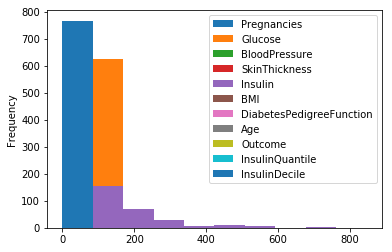

In [42]:
df.plot.hist()

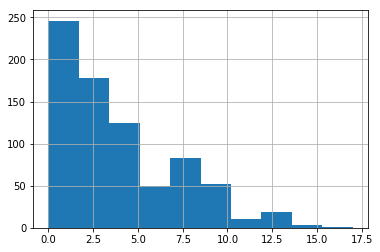

In [43]:
df.Pregnancies.hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x116ab3048>,
      dtype=object)

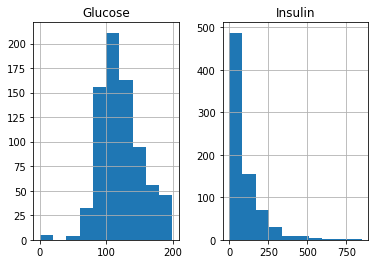

In [44]:
df[['Glucose','Insulin']].hist()

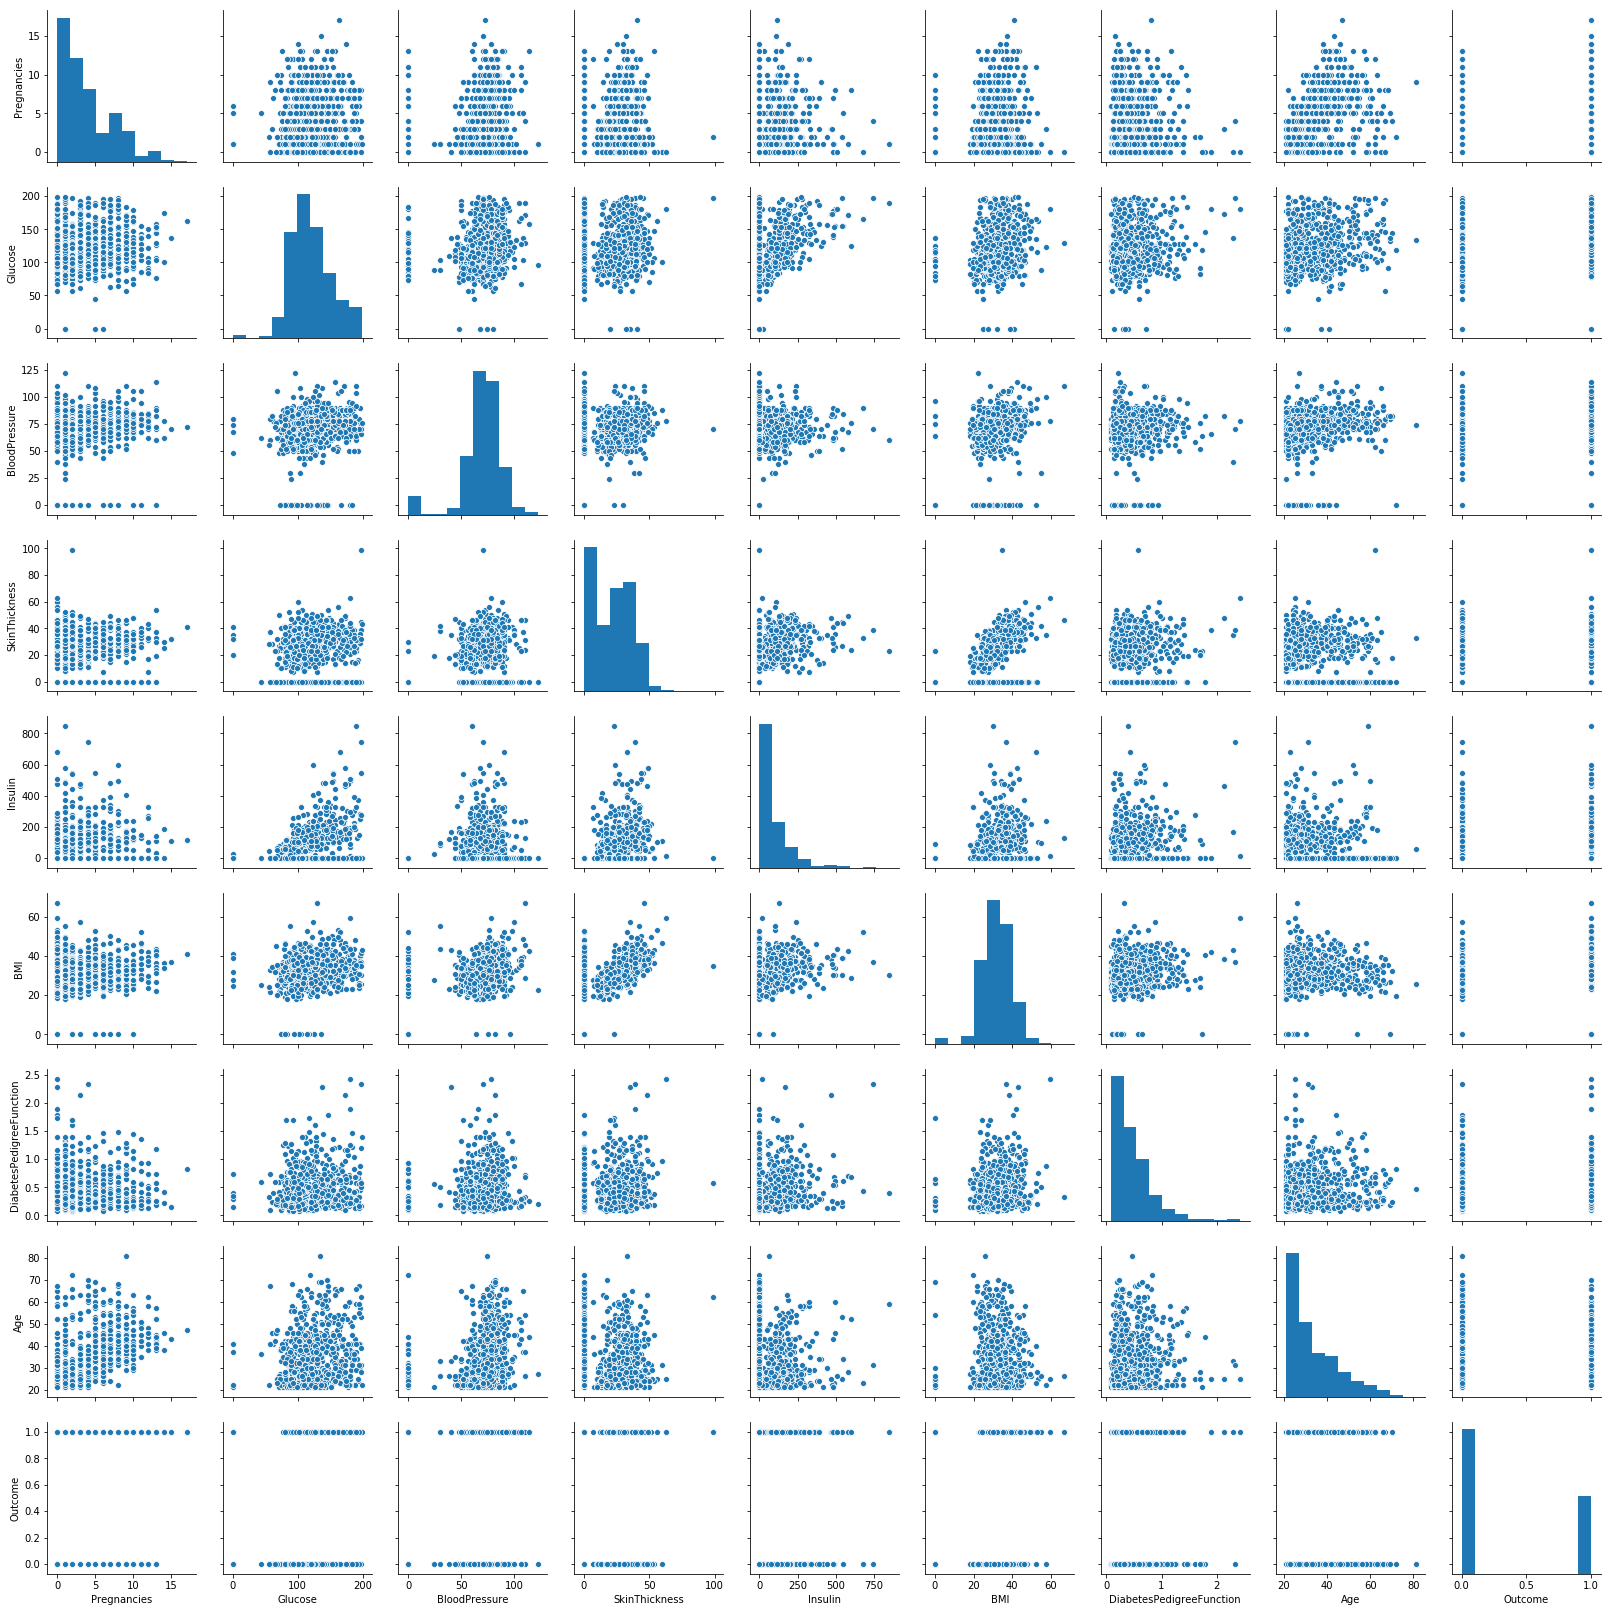

In [56]:
sns.pairplot(df)

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


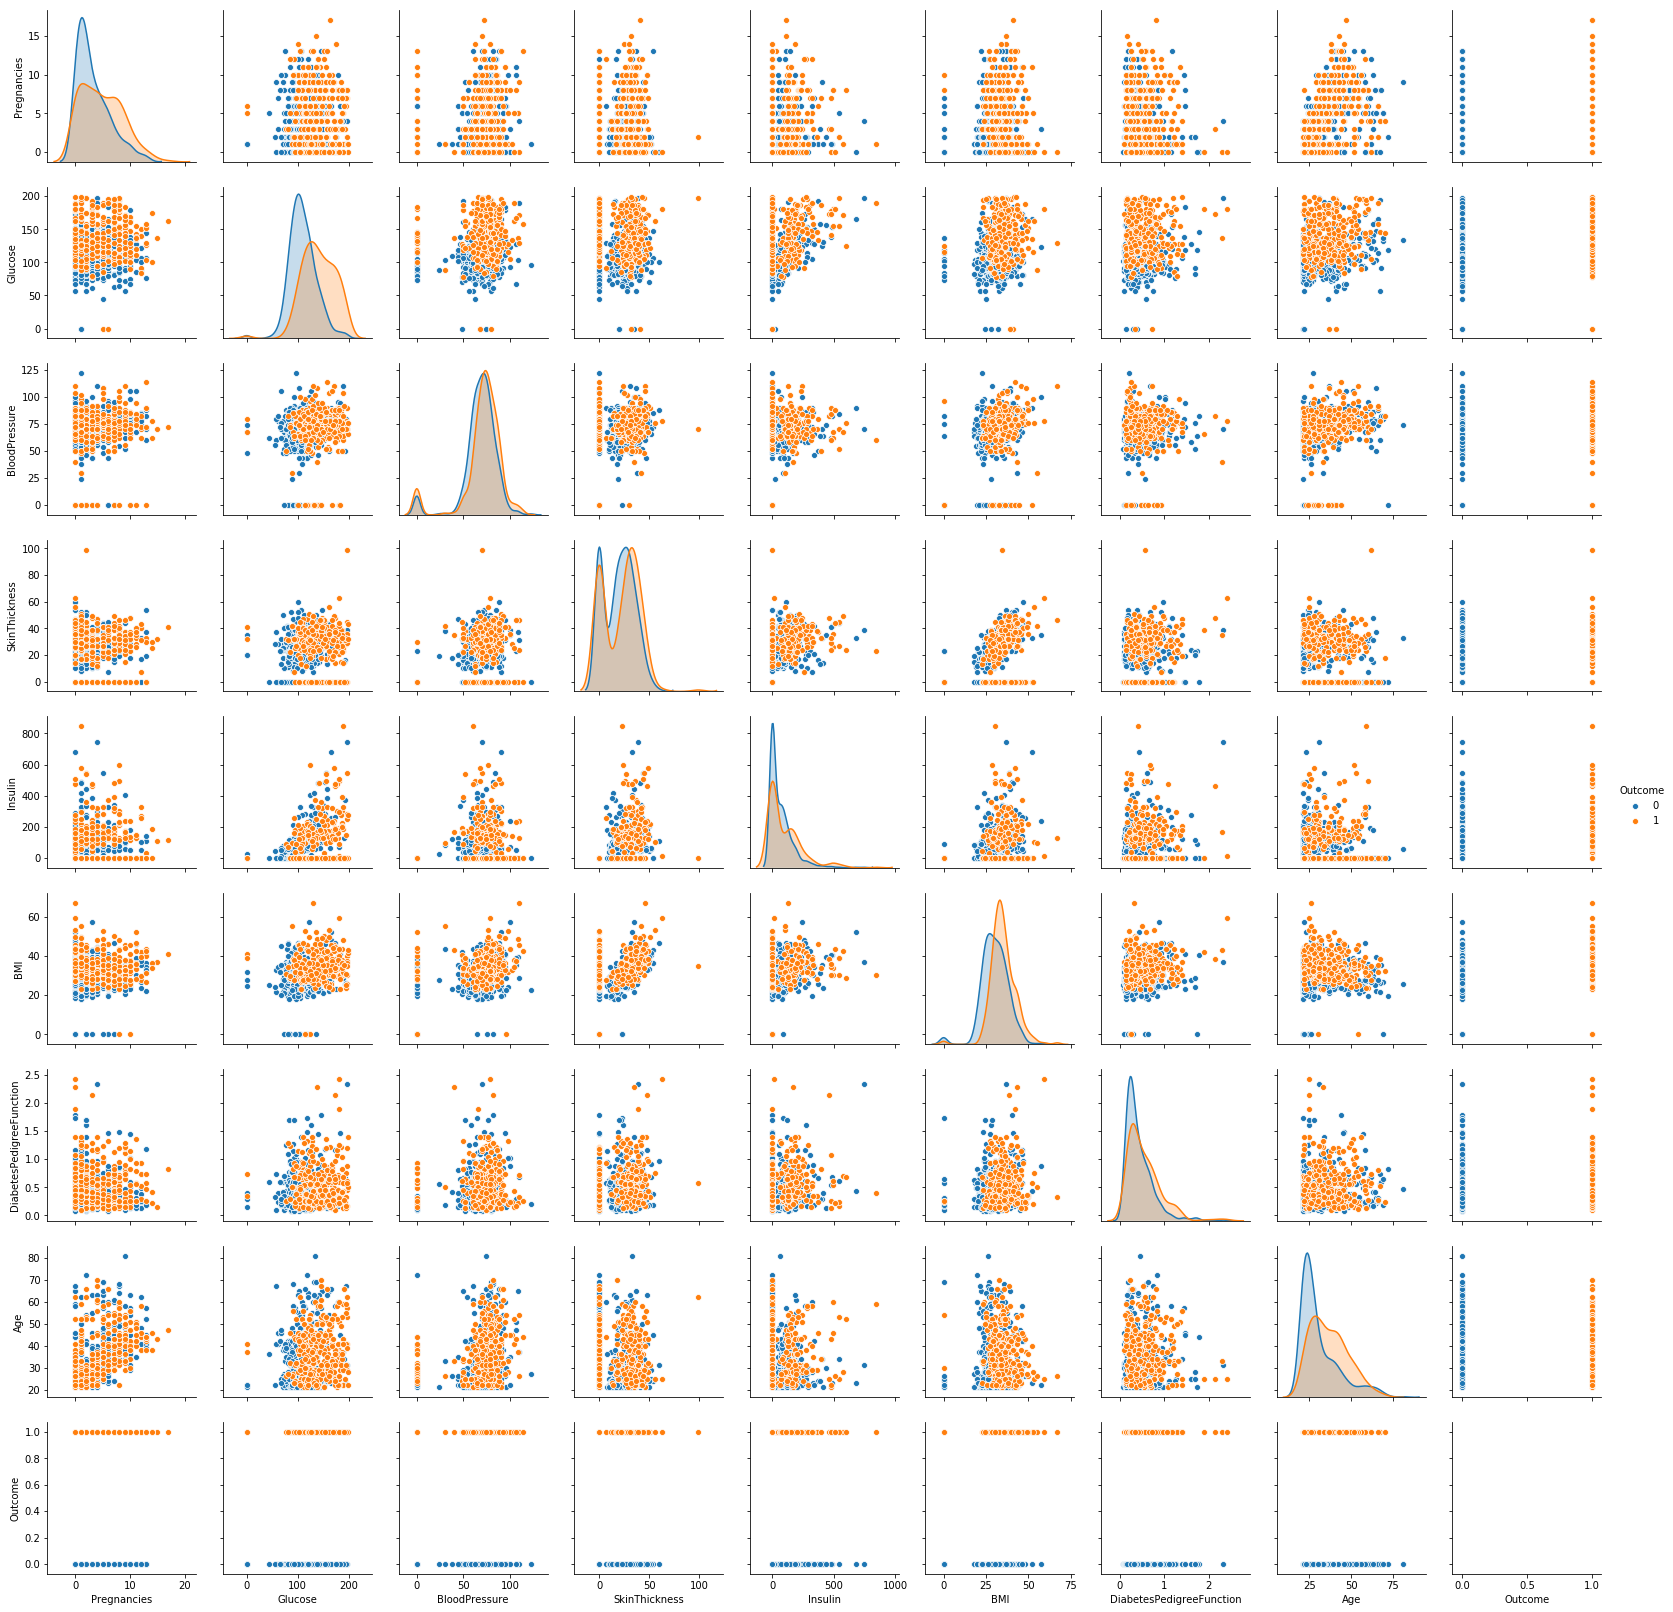

In [57]:
sns.pairplot(df, hue='Outcome')

In [59]:
iris = sns.load_dataset('iris')

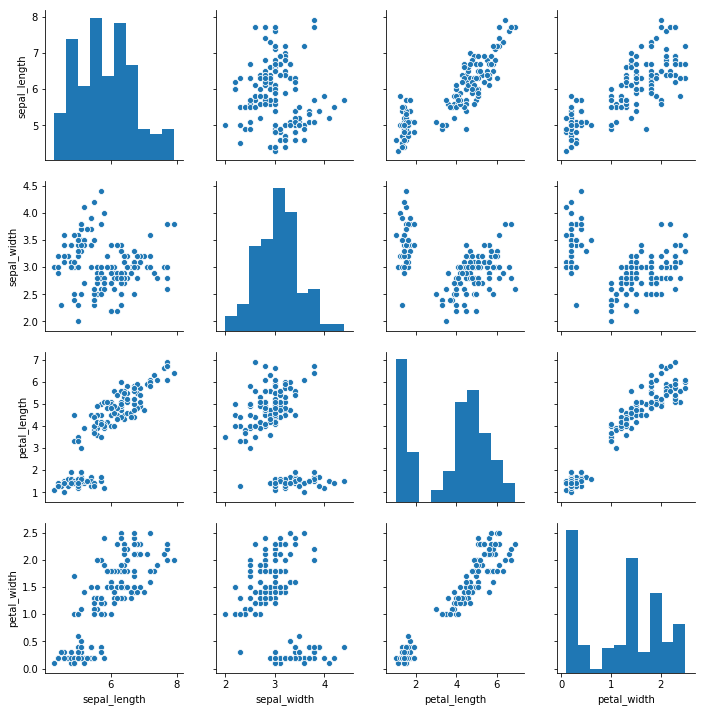

In [60]:
sns.pairplot(iris)

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


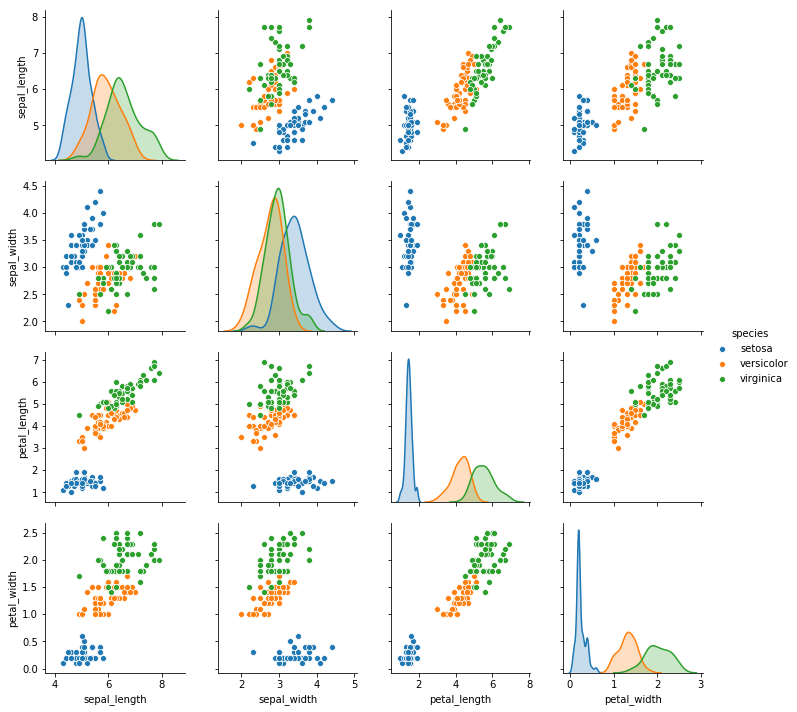

In [63]:
sns.pairplot(iris, hue='species')

<img src='https://upload.wikimedia.org/wikipedia/commons/7/78/Petal-sepal.jpg'>

In [66]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


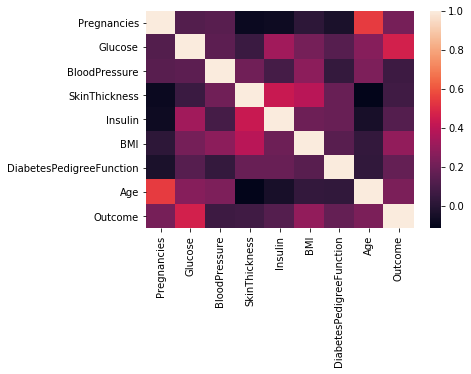

In [69]:
sns.heatmap(df.corr(), 
         xticklabels=df.corr().columns, 
         yticklabels=df.corr().columns)

In [71]:
'''
Brighter colors indicate more correlation. 
Glucose levels, BMI, age, and # pregnancies have significant correlation with the Outcome. 
Notice the correlation between pairs of features, like age and pregnancies, or insulin and skin thickness.
'''

'\nBrighter colors indicate more correlation. \nGlucose levels, BMI, age, and # pregnancies have significant correlation with the Outcome. \nNotice the correlation between pairs of features, like age and pregnancies, or insulin and skin thickness.\n'

In [74]:
df[['Glucose','BMI','Age','Pregnancies']]

,Glucose,BMI,Age,Pregnancies
0,148,33.6,50,6
1,85,26.6,31,1
2,183,23.3,32,8
3,89,28.1,21,1
4,137,43.1,33,0
5,116,25.6,30,5
6,78,31.0,26,3
7,115,35.3,29,10
8,197,30.5,53,2
9,125,0.0,54,8


In [75]:
df_significant_correlation = df[['Glucose','BMI','Age','Pregnancies']]

In [78]:
df_significant_correlation.to_csv('diabetes_significant_correlation.csv', index=False)

# Machine Learning

## Logistic Regression

In [79]:
X = df[['Glucose','BMI','Age','Pregnancies']]
y = df['Outcome']

In [82]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [83]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [84]:
predictions = model.predict(X_test)
predictions

array([0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0])

In [86]:
accuracy = metrics.accuracy_score(y_test, predictions)
accuracy

0.7272727272727273

In [87]:
pd.DataFrame(model.coef_, index = ['Coef'], columns = X.columns).T

,Coef
Glucose,0.026866
BMI,0.050514
Age,-0.007319
Pregnancies,0.136485


In [88]:
print(classification_report(y_test, predictions))

             precision    recall  f1-score   support

          0       0.75      0.85      0.80        98
          1       0.66      0.52      0.58        56

avg / total       0.72      0.73      0.72       154



precision: ability of a classification model to return only relevant instances


recall: ability of a classification model to identify all relevant instances


F1 score: single metric that combines recall and precision using the harmonic mean


In [89]:
print(confusion_matrix(y_test, predictions))

[[83 15]
 [27 29]]


In [90]:
pd.crosstab(y_test, predictions, rownames=['Actual'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
Actual,,,
0,83,15,98
1,27,29,56
All,110,44,154


In [91]:
tn, fp, fn, tp = confusion_matrix(y_test, predictions).ravel()
tn, fp, fn, tp

(83, 15, 27, 29)


True positives: data points labeled as positive that are actually positive

---


False positives: data points labeled as positive that are actually negative

---


True negatives: data points labeled as negative that are actually negative

---


False negatives: data points labeled as negative that are actually positive